In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [10]:
import lightgbm as lgb

In [106]:
puppy = pd.read_csv('lgbtrain.csv')

In [107]:
puppy["Color"]=puppy["Color"].astype('category')
puppy["Breed"]=puppy["Breed"].astype('category')


In [108]:
puppy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23630 entries, 0 to 23629
Data columns (total 19 columns):
Unnamed: 0           23630 non-null int64
Type                 23630 non-null int64
Age                  23630 non-null int64
Gender               23630 non-null int64
MaturitySize         23630 non-null int64
FurLength            23630 non-null int64
Vaccinated           23630 non-null int64
Dewormed             23630 non-null int64
Sterilized           23630 non-null int64
Health               23630 non-null int64
Fee                  23630 non-null int64
State                23630 non-null int64
PhotoAmt             23630 non-null float64
AdoptionSpeed        23630 non-null int64
Organization         23630 non-null float64
NameBi               23630 non-null float64
DescriptionLenght    23613 non-null float64
Breed                23630 non-null category
Color                23630 non-null category
dtypes: category(2), float64(4), int64(13)
memory usage: 3.2 MB


In [110]:
general = puppy[["Type","Age","Gender","MaturitySize","FurLength","Health","Color","Breed","AdoptionSpeed"]]
changing = puppy[["Vaccinated","Dewormed","Sterilized","Fee","PhotoAmt","Organization","NameBi","DescriptionLenght","AdoptionSpeed"]]

In [111]:
from sklearn.model_selection import train_test_split
train, test, y, y_test = train_test_split(changing.drop("AdoptionSpeed",axis=1),changing['AdoptionSpeed'],
                                                    test_size=0.30)


In [79]:
sub = pd.read_csv('sample_submission.csv')

In [112]:
train

,Vaccinated,Dewormed,Sterilized,Fee,PhotoAmt,Organization,NameBi,DescriptionLenght
670,2,1,2,0,5.0,0.0,1.0,3100.0
21590,2,2,1,0,1.0,0.0,1.0,183.0
9934,3,3,3,0,1.0,1.0,0.0,74.0
14199,1,1,1,0,1.0,0.0,1.0,174.0
21194,2,2,2,0,2.0,0.0,0.0,145.0
6068,3,3,3,0,3.0,0.0,1.0,352.0
18256,2,2,2,0,4.0,0.0,0.0,177.0
4338,2,2,2,0,3.0,1.0,0.0,214.0
15103,2,2,2,0,8.0,0.0,1.0,186.0
16885,2,2,1,0,5.0,1.0,1.0,861.0


In [80]:
train= train.drop("Unnamed: 0",axis=1)
test = test.drop("Unnamed: 0",axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16541 entries, 9376 to 17798
Data columns (total 8 columns):
Vaccinated           16541 non-null int64
Dewormed             16541 non-null int64
Sterilized           16541 non-null int64
Fee                  16541 non-null int64
PhotoAmt             16541 non-null float64
Organization         16541 non-null float64
NameBi               16541 non-null float64
DescriptionLenght    16527 non-null float64
dtypes: float64(4), int64(4)
memory usage: 1.1 MB


In [113]:
cat_cols=["Vaccinated","Dewormed","Sterilized","Organization","NameBi"]

In [66]:
#'No_name', 'Pure_breed', 'health', 'Free'

In [101]:
from sklearn.model_selection import StratifiedKFold
n_fold = 5
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=15)

In [102]:
params = {'num_leaves': 512,
        #  'min_data_in_leaf': 60,
         'objective': 'multiclass',
         'max_depth': -1,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 3,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
        #  "lambda_l1": 0.1,
         # "lambda_l2": 0.1,
         "random_state": 42,          
         "verbosity": -1,
         "num_class": 5}

In [103]:
def train_model(X=train, X_test=test, y=y, params=None, folds=folds, cat_cols=cat_cols):
    result_dict = {}
    prediction = np.zeros((len(X_test), 5))
    scores = []
    feature_importance = pd.DataFrame()
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
        gc.collect()
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        
    train_data = lgb.Dataset(X_train, label=y_train, categorical_feature = cat_cols)
    valid_data = lgb.Dataset(X_valid, label=y_valid, categorical_feature = cat_cols)
          
    model = lgb.train(params,
            train_data,
            num_boost_round=20000,
            valid_sets = [train_data, valid_data],
            verbose_eval=500,
            early_stopping_rounds = 200)

    del train_data, valid_data
            
    y_pred_valid = model.predict(X_valid, num_iteration=model.best_iteration)
    del X_valid
    gc.collect()
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)
            
    
        # feature importance
    fold_importance = pd.DataFrame()
    fold_importance["feature"] = X.columns
    fold_importance["importance"] = model.feature_importance()
    fold_importance["fold"] = fold_n + 1
    feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_fold
    
    
        
    feature_importance["importance"] /= n_fold
    cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
        by="importance", ascending=False)[:50].index

    best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

    plt.figure(figsize=(16, 12));
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
    plt.title('LGB Features (avg over folds)');
            
    result_dict['feature_importance'] = feature_importance
            
    result_dict['prediction'] = prediction
    print(y_pred)
    
    return result_dict

C:\Users\raian\Anaconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\raian\Anaconda3\lib\site-packages\lightgbm\basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 200 rounds.
[500]	training's multi_logloss: 0.567937	valid_1's multi_logloss: 0.822184
[1000]	training's multi_logloss: 0.421405	valid_1's multi_logloss: 0.80699
Early stopping, best iteration is:
[896]	training's multi_logloss: 0.444614	valid_1's multi_logloss: 0.80591


C:\Users\raian\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\raian\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\raian\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\raian\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\raian\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


CV mean score: nan, std: nan.
[[1.95501436e-01 1.14949003e-01 6.89549561e-01 9.04889047e-16
  9.04889047e-16]
 [3.37892876e-01 4.47642747e-01 2.14464377e-01 7.27374031e-16
  7.27374031e-16]
 [2.35642518e-01 3.94291648e-01 3.70065834e-01 9.00554321e-16
  9.00554321e-16]
 ...
 [5.05352624e-01 4.55105470e-01 3.95419057e-02 7.03087140e-16
  7.03087140e-16]
 [1.32585618e-01 8.48729253e-01 1.86851293e-02 5.16127929e-16
  5.16127929e-16]
 [6.54805058e-01 1.12962156e-01 2.32232787e-01 9.27931890e-16
  9.27931890e-16]]


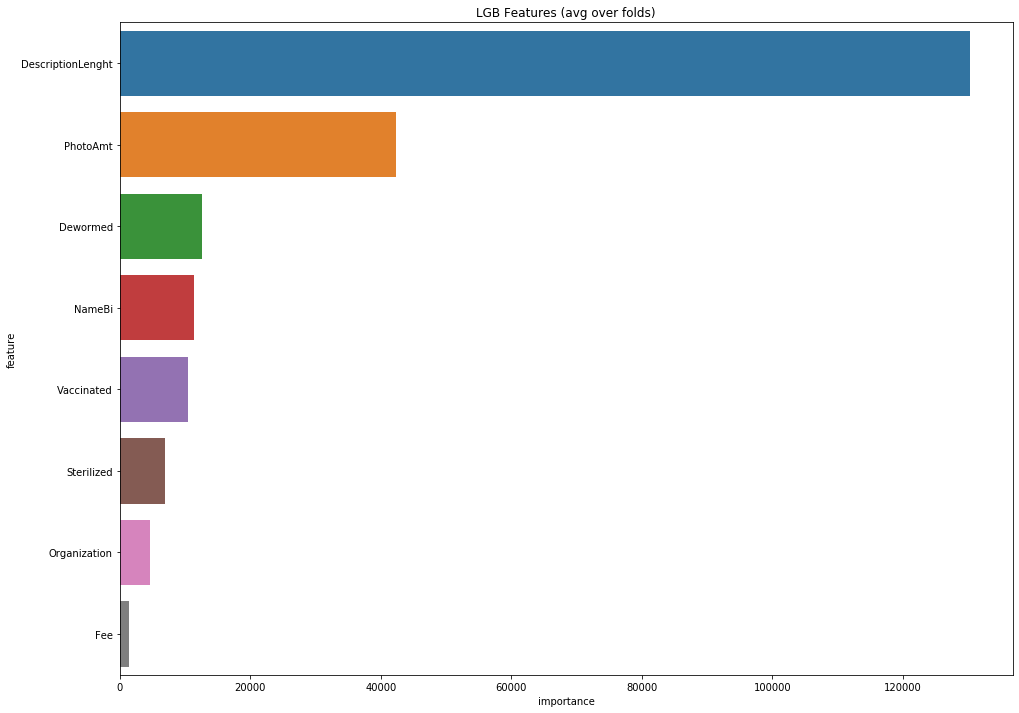

In [114]:
result_dict_lgb = train_model(X=train, X_test=test, y=y, params=params, cat_cols=cat_cols)

In [46]:
prediction = result_dict_lgb['prediction'] 
submission = pd.DataFrame({'PetID': sub.PetID, 'AdoptionSpeed': [int(i) for i in prediction]})
submission.head()

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
submission.to_csv('submission.csv', index=False)

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test,result_dict_lgb['prediction']))

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets